# Procesamiento de lenguaje natural

Para analizar esta seccion se creo un twitter scraper para poder racopilar informacion relacionada con choques en la CDMX y procesarla y analizarla

In [1]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

Se genero un codigo para poder extrar informacion de twiter de la cuenta *@trafico889* la cual reporta accidentes viales. Este codigo se encuentra en el archivo **twiter_scraper.py**. Se puede ejecutar directamente desde la consola de comandos. De igual forma dentro del archivo se describen los parametros que se usaron para recopilar la informacion y generar el dataset **accidentes_cdmx.json** el cual se encuentra en la carpeta **datasets**

In [2]:
#import os
#os.system('twint -u "trafico889" --search="choque" --since "2015-01-01 21:30:00" --until "2019-12-30 22:30:00" -o Accidentes_cdmx.csv --csv')

In [3]:
#lectura del Dataset
df = pd.read_json('datasets/accidentes_cdmx.json',lines=True)

df.head()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1210983664575631360,1210983664575631360,2019-12-28 11:59:39 Hora estándar central (Méx...,2019-12-28,11:59:39,-500,40098528,trafico889,Radio Tráfico Total,,...,,,,,,[],,,,
1,1210921934994599936,1210921934994599936,2019-12-28 07:54:21 Hora estándar central (Méx...,2019-12-28,07:54:21,-500,40098528,trafico889,Radio Tráfico Total,,...,,,,,,[],,,,
2,1210674207027187713,1210674207027187712,2019-12-27 15:29:58 Hora estándar central (Méx...,2019-12-27,15:29:58,-500,40098528,trafico889,Radio Tráfico Total,,...,,,,,,[],,,,
3,1210570451589558272,1210570451589558272,2019-12-27 08:37:41 Hora estándar central (Méx...,2019-12-27,08:37:41,-500,40098528,trafico889,Radio Tráfico Total,,...,,,,,,[],,,,
4,1210367411058163712,1210367411058163712,2019-12-26 19:10:52 Hora estándar central (Méx...,2019-12-26,19:10:52,-500,40098528,trafico889,Radio Tráfico Total,,...,,,,,,[],,,,


Se filtran los datos para extraer unicamente el texto o el twiter publicado

In [4]:
grouped_by_id = df.groupby('id')['tweet'].max()

grouped_by_id

id
7284841063             Con cuidado!! hay un choque aparatoso en   #Ej...
7286873093             con cuidado, hay un choque en la  Autopista Me...
7311588888             Choque  en Plutarco Elias Calles  Dir. Norte  ...
7375428690             choque multiple en  Circuito Interior con  Dir...
7375871227             Choque multiple  en Circuito Interior  Dir. No...
                                             ...                        
1210367411058163712    Gracias a nuestro wazer: Zagatoyou, nos report...
1210570451589558272    Gracias a nuestro Wazer: Olwasdoc, nos informa...
1210674207027187713    #Choque sobre Periférico a la altura de Gral. ...
1210921934994599936    Servicios de emergencia laboran en #choque sob...
1210983664575631360    Gracias a nuestro wazer: Rodrigo Galindo, nos ...
Name: tweet, Length: 12048, dtype: object

In [5]:
#limpieza de los datos
grouped_by_id = grouped_by_id.str.lower()
grouped_by_id = grouped_by_id.str.strip()
grouped_by_id = grouped_by_id.str.replace('[^\w\s]', '')
grouped_by_id = grouped_by_id.str.replace('\d', '')
grouped_by_id = grouped_by_id.str.replace('\\n', '')
grouped_by_id = grouped_by_id.str.replace('rt', '')
grouped_by_id = grouped_by_id.dropna()

grouped_by_id

id
7284841063             con cuidado hay un choque aparatoso en   ejece...
7286873093             con cuidado hay un choque en la  autopista mex...
7311588888             choque  en plutarco elias calles  dir noe  a l...
7375428690             choque multiple en  circuito interior con  dir...
7375871227             choque multiple  en circuito interior  dir noe...
                                             ...                        
1210367411058163712    gracias a nuestro wazer zagatoyou nos repoa un...
1210570451589558272    gracias a nuestro wazer olwasdoc nos informa d...
1210674207027187713    choque sobre periférico a la altura de gral ju...
1210921934994599936    servicios de emergencia laboran en choque sobr...
1210983664575631360    gracias a nuestro wazer rodrigo galindo nos in...
Name: tweet, Length: 12048, dtype: object

In [6]:
# complemento necesario de la libreria nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Sergio\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [7]:
# Separamos cada oración en palabras

tokenized = grouped_by_id.apply(nltk.word_tokenize)

In [8]:
tokenized

id
7284841063             [con, cuidado, hay, un, choque, aparatoso, en,...
7286873093             [con, cuidado, hay, un, choque, en, la, autopi...
7311588888             [choque, en, plutarco, elias, calles, dir, noe...
7375428690             [choque, multiple, en, circuito, interior, con...
7375871227             [choque, multiple, en, circuito, interior, dir...
                                             ...                        
1210367411058163712    [gracias, a, nuestro, wazer, zagatoyou, nos, r...
1210570451589558272    [gracias, a, nuestro, wazer, olwasdoc, nos, in...
1210674207027187713    [choque, sobre, periférico, a, la, altura, de,...
1210921934994599936    [servicios, de, emergencia, laboran, en, choqu...
1210983664575631360    [gracias, a, nuestro, wazer, rodrigo, galindo,...
Name: tweet, Length: 12048, dtype: object

In [9]:
# Sumamos todas las listas para obtener una lista con todas las palabras en nuestro conjunto de datos
# Creamos un objeto Text

all_words = tokenized.sum()
text = nltk.Text(all_words)

text

<Text: con cuidado hay un choque aparatoso en ejecentral...>

De acuerdo a los analisis realizados sabemos que los accidentes de autos son los mas comunes, por lo tanto buscaremos los tweets que contengan la palabra automovil

In [10]:
text.concordance('automovil', lines=20)

no matches


Al parecer nadie reporta la palabra automovil. Sin embargo si reportan la palabra "auto"

In [11]:
text.concordance("auto")

Displaying 25 of 37 matches:
cion a eduardo molina un choque y un auto volco ya laboran servicios de emerge
io churubusco hay un choque entre un auto y un microbus afecta de forma severa
retera naucalpan toluca un choque un auto y trailer un lesionado afecta ambos 
e los remedios entre un trailer y un auto choque en periferico dirección sur a
ubo un choque entre el metrobus y un auto paicular lo que afecta el cruce de e
ron el choque entre el metrobus y un auto paicular que afectaba el cruce de ej
 revolución es entre un trailer y un auto cy edvardoa hubo un choque km al df 
rafico choque en insurgentes y bajío auto volcado httptcovaeivvb gracias por l
sobre av coyoacan esquina eje hay un auto atravesado httptcoxjjybid gracias ch
arosaliajaim choque porsche blanco y auto rojo km mexicocuernavaca envíen asis
a reforma ab gotf hay un choque y un auto descompuesto sobre carriles centrale
 del km hacia el df maruahu camión y auto detenidos aparente choque sobre late
ducto pmtz rossyvazquez

Sin embargo para ser que no es muy comun reportar el tipo de vehiculo. Analizaremos un poco mas a detalle las palabras generadas.

In [12]:
# Total de palabras distintas

len(set(text))

6152

In [13]:
# Cuantificando la riqueza léxica

len(set(text)) / len(text)

0.031879611972473264

In [14]:
# Utilizamos FreqDist para analizar la distribución de frecuencia de nuestras palabras

freq_dist = nltk.FreqDist(all_words)

print(freq_dist)



<FreqDist with 6152 samples and 192976 outcomes>


In [15]:
#observamos las 50 palabras mas comunes
freq_dist.most_common(50)

[('de', 12308),
 ('choque', 12024),
 ('en', 11849),
 ('la', 10101),
 ('a', 8757),
 ('un', 7090),
 ('altura', 5271),
 ('hay', 4246),
 ('hacia', 3994),
 ('dirección', 3411),
 ('el', 3188),
 ('con', 2869),
 ('periférico', 2837),
 ('cuidado', 2784),
 ('del', 2247),
 ('av', 2172),
 ('eje', 2078),
 ('y', 1929),
 ('sobre', 1677),
 ('pasando', 1621),
 ('antes', 1566),
 ('mg', 1482),
 ('interior', 1369),
 ('sur', 1364),
 ('viaducto', 1269),
 ('ocurrió', 1263),
 ('san', 1230),
 ('noe', 1217),
 ('calz', 1215),
 ('insurgentes', 1175),
 ('reforma', 1172),
 ('al', 1167),
 ('circuito', 1059),
 ('múltiple', 911),
 ('gracias', 895),
 ('tlalpan', 862),
 ('cerca', 842),
 ('río', 831),
 ('carriles', 812),
 ('constituyentes', 756),
 ('centrales', 734),
 ('precaución', 734),
 ('méxico', 722),
 ('autopista', 701),
 ('lento', 627),
 ('nuestro', 610),
 ('wazer', 608),
 ('avance', 592),
 ('maneja', 585),
 ('por', 573)]

In [16]:
# extension necesaria para poder eliminar las palabras que no son representativas
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Sergio\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True



Vamos a eliminar las 'palabras vacías' o 'stop words'

Para hacer esto realizamos lo siguiente:

In [17]:
from nltk.corpus import stopwords

In [18]:
spanish_stop_words = stopwords.words('spanish')

all_words_except_stop_words = [word for word in all_words if word not in spanish_stop_words]

freq_dist_no_stop_words = nltk.FreqDist(all_words_except_stop_words)

In [19]:
freq_dist_no_stop_words.most_common(50)

[('choque', 12024),
 ('altura', 5271),
 ('hacia', 3994),
 ('dirección', 3411),
 ('periférico', 2837),
 ('cuidado', 2784),
 ('av', 2172),
 ('eje', 2078),
 ('pasando', 1621),
 ('mg', 1482),
 ('interior', 1369),
 ('sur', 1364),
 ('viaducto', 1269),
 ('ocurrió', 1263),
 ('san', 1230),
 ('noe', 1217),
 ('calz', 1215),
 ('insurgentes', 1175),
 ('reforma', 1172),
 ('circuito', 1059),
 ('múltiple', 911),
 ('gracias', 895),
 ('tlalpan', 862),
 ('cerca', 842),
 ('río', 831),
 ('carriles', 812),
 ('constituyentes', 756),
 ('centrales', 734),
 ('precaución', 734),
 ('méxico', 722),
 ('autopista', 701),
 ('lento', 627),
 ('wazer', 608),
 ('avance', 592),
 ('maneja', 585),
 ('cruce', 555),
 ('hr', 533),
 ('zaragoza', 524),
 ('provoca', 507),
 ('trafico', 478),
 ('metro', 472),
 ('toluca', 463),
 ('cto', 454),
 ('nacional', 446),
 ('dir', 422),
 ('km', 421),
 ('raza', 402),
 ('emergencia', 401),
 ('antonio', 400),
 ('central', 399)]

Podemos observar que la palabra mas comun en choque, lo cual es obvio ya que la busqueda de tweets fue en base a esta palabra. Tambien podemos observar en las palabras comunes el nombre algunas calles o lugares comunes en los cuales suceden accidentes. Graficamente lo observariamos de la siguiente forma

In [20]:
#tokenized = grouped_by_id.apply(nltk.word_tokenize)
#all_words = tokenized.sum()

#english_stop_words = stopwords.words('spanish')
#all_words_except_stop_words = [word for word in all_words if word not in english_stop_words]

#freq_dist = nltk.FreqDist(all_words_except_stop_words)

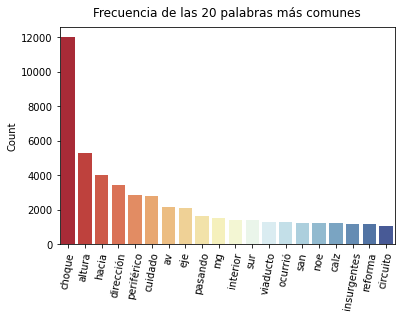

In [21]:
# Podemos visualizar la frecuencia de las palabras más comunes

most_common_20 = np.array(list(map(lambda x: list(x), freq_dist_no_stop_words.most_common(20))))
count=[int(x[1]) for x in most_common_20]
fig = plt.figure()
ax = fig.add_subplot()

sns.barplot(most_common_20[:, 0], count, ax=ax, palette='RdYlBu');
ax.set_title('Frecuencia de las 20 palabras más comunes', pad=10)
ax.set_ylabel('Count')
ax.tick_params(axis='x', rotation=80)

Para indagar mas en las palabras comunes y observar si existen mas calles o lugares de la CDMX donde sucedan accidentes mas seguido

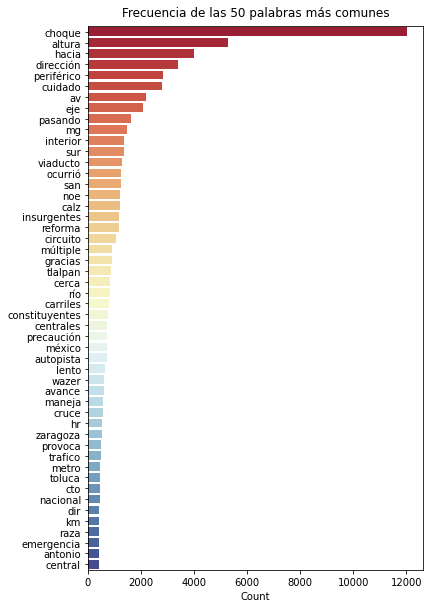

In [22]:
most_common_50 = np.array(list(map(lambda x: list(x), freq_dist_no_stop_words.most_common(50))))
count=[int(x[1]) for x in most_common_50]
fig = plt.figure(figsize=(6, 10))
ax = fig.add_subplot()

sns.barplot(count, most_common_50[:, 0], ax=ax, palette='RdYlBu', orient='h');
ax.set_title('Frecuencia de las 50 palabras más comunes', pad=10)
ax.set_xlabel('Count');

Al seguir analizando cada vez notamos mas palabras referenciadas a lugares, como periferico, Viaducto, reforma, tlalpan y constituyentes. 

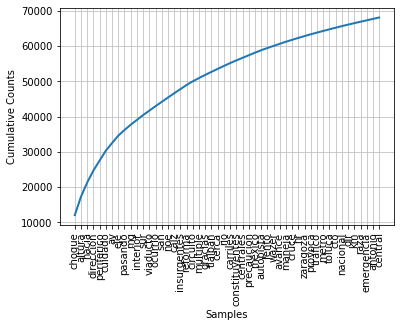

In [23]:
# Veamos qué proporción del text está siendo ocupada por las 50 palabras más comunes

freq_dist_no_stop_words.plot(50, cumulative=True);

Ya que auto, no aprece en las 50 palabras mas comunes, revisaremos su porcentaje de aparicion

In [24]:
#porcentaje de aparicion
print(f'{(100 * freq_dist_no_stop_words["auto"] / len(all_words_except_stop_words)):.3f}%')

0.032%


De igual forma analizaremos las palabras que aparecen solo una vez  y las palabras mas largas para ver si podemos ver mas tipos de vehiculos

In [25]:
# Palabras que sólo aparecen una sola vez

freq_dist_no_stop_words.hapaxes()[:20]

['ejecentral',
 'correspondencia',
 'desviación',
 'tamarindo',
 'diereccion',
 'cuellar',
 'encuntran',
 'autopistamexicopuebla',
 'autopistamexicocuernavaca',
 'iztacihuatl',
 'oaxtepec',
 'pesar',
 'jerico',
 'mariquita',
 'sanchez',
 'lesionado',
 'rapida',
 'laáguilas',
 'camellon',
 'divide']

In [26]:
# Palabras largas

unique = set(all_words_except_stop_words)
unique_series = pd.Series(list(unique))

unique_series
unique_series[unique_series.str.len() > 15].head(20)



30         httptcohdmrdxrma
38         httptcosfiwzirzy
97         httpstcolvbkgaap
98         diablitogonzalez
104      httpstcosusjcqeuod
111        avconstituyentes
116        httptcohxjchcerr
121        anilloperiférico
125        httpstcoysamtumr
126        httpstcoiwlieltx
139        httptcobfywwzvtb
146        httptcorfluhvkip
183        httptcoiyqyfzplr
185    danielarodríguezcool
186       httpstcofmevqzjax
187        httptcovibjpxoiv
209        httptcosohfnrhex
221        httpstcoyibbqfrx
244       httptcolhukvjsesi
245       httpstcoilbzfquex
dtype: object

In [27]:
# Palabras largas que son frecuentes

larger_than_10 = unique_series.str.len() > 7
is_frequent = unique_series.apply(lambda x: freq_dist_no_stop_words[x] > 7)

unique_series[larger_than_10 & is_frequent].head(20)

7          alvarado
33       accidentes
57         supervía
106       kilómetro
113        recuerda
115    involucrados
134        poniente
141    azcapotzalco
153        ejercito
189        economía
204        talismán
223      churubusco
224        detenido
307      encuentras
341       centrales
349     circulacion
361       aparatoso
378        ecatepec
391       industria
394        desnivel
dtype: object

Como nortamos la palabra auto no es nada comun, al igual que otros tipos de vehiculos no parecen ser reportados. los tweets o texto se centra mas en los lugares en los cuales sucedieron los accidentes. Por lo cual analizar el tipo de vehiculo no sera relevante en este analisis.

Analizaremos mas profudamente los lugares de los accidentes para encontrar los mas comunes. Primero empezaremos por un analisis de la combinacion de 2 palabras mas comunes (bigrama)

In [28]:
# frecuencia de los bigramas más comunes

text = nltk.Text(all_words)
freq_dist_bigrams = nltk.FreqDist(list(nltk.bigrams(text)))

freq_dist_bigrams

FreqDist({('choque', 'en'): 7719, ('un', 'choque'): 6859, ('a', 'la'): 5675, ('la', 'altura'): 5231, ('altura', 'de'): 4425, ('hay', 'un'): 3981, ('dirección', 'a'): 1863, ('de', 'la'): 1589, ('choque', 'sobre'): 1414, ('antes', 'de'): 1380, ...})

C:\Users\Sergio\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  


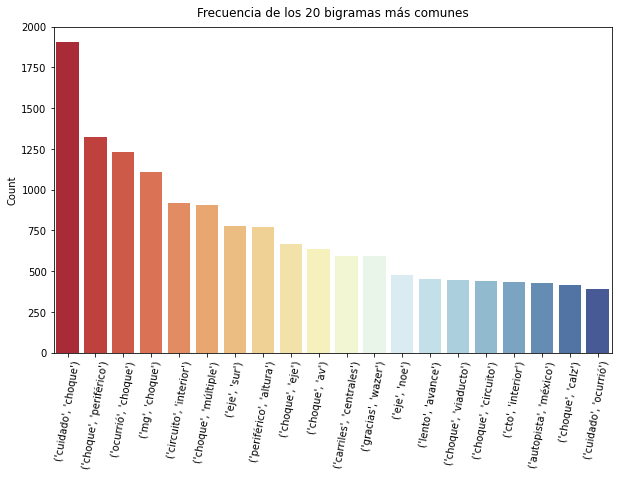

In [37]:
#Para graficar ocupamos lo siguiente.
most_common_20 = np.array(list(map(lambda x: list(x), freq_dist_bigrams.most_common(20))))

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot()

sns.barplot(most_common_20[:, 0], most_common_20[:, 1], ax=ax, palette='RdYlBu');
ax.set_title('Frecuencia de los 20 bigramas más comunes', pad=10)
ax.set_ylabel('Count')
ax.tick_params(axis='x', rotation=80)

A pesar de que se hizo el agrupamiento en grupos de dos palabras, existen todavia algunas palabras que no son representativas ya que son conectores como: en, a, de, etc. Por lo cual se excluiran estas palabras y se realizara nuevamente el grafico.

In [30]:
# Usando la lista generada al filtrar por stopwords

text = nltk.Text(all_words_except_stop_words)
freq_dist_bigrams = nltk.FreqDist(list(nltk.bigrams(text)))

freq_dist_bigrams

FreqDist({('cuidado', 'choque'): 1905, ('choque', 'periférico'): 1325, ('ocurrió', 'choque'): 1234, ('mg', 'choque'): 1111, ('circuito', 'interior'): 918, ('choque', 'múltiple'): 906, ('eje', 'sur'): 778, ('periférico', 'altura'): 769, ('choque', 'eje'): 668, ('choque', 'av'): 639, ...})

C:\Users\Sergio\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  


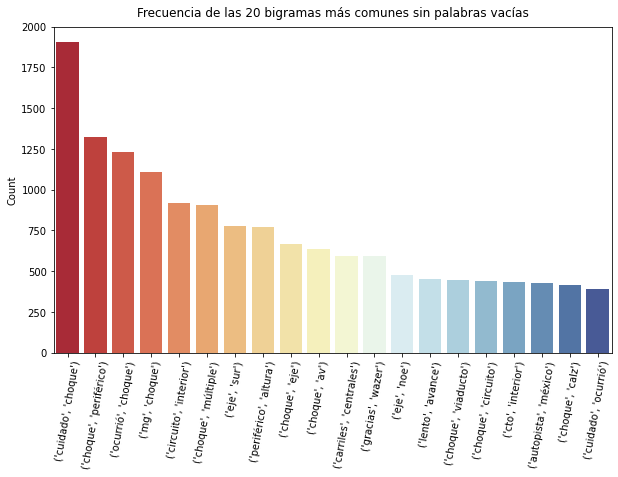

In [38]:
#generacion del Grafico
most_common_20 = np.array(list(map(lambda x: list(x), freq_dist_bigrams.most_common(20))))

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot()

sns.barplot(most_common_20[:, 0], most_common_20[:, 1], ax=ax, palette='RdYlBu');
ax.set_title('Frecuencia de las 20 bigramas más comunes sin palabras vacías', pad=10)
ax.set_ylabel('Count')
ax.tick_params(axis='x', rotation=80)

Eliminando estas palabras podemos observar mejor las relaciones y patrones para lugares comunes de accidentes. Ahora realizaremos lo mismo utilizando agrupaciones de 3 palabras.

In [32]:
# requerimientos para ngramas

from nltk.util import ngrams

C:\Users\Sergio\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """


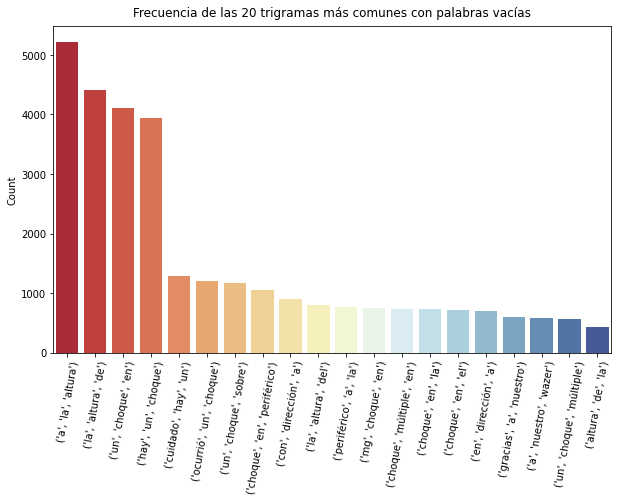

In [39]:
#generacion del grafico
text = nltk.Text(all_words)
freq_dist_trigrams = nltk.FreqDist(list(ngrams(text, 3)))

most_common_20 = np.array(list(map(lambda x: list(x), freq_dist_trigrams.most_common(20))))

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot()

sns.barplot(most_common_20[:, 0], most_common_20[:, 1], ax=ax, palette='RdYlBu');
ax.set_title('Frecuencia de las 20 trigramas más comunes con palabras vacías', pad=10)
ax.set_ylabel('Count')
ax.tick_params(axis='x', rotation=80)

Nuevamente nos encontramos con la presencia de palabras que son conectores por lo cual no son relevantes, excluyendo estas palabras podemos generar algo mas representativo

C:\Users\Sergio\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  after removing the cwd from sys.path.


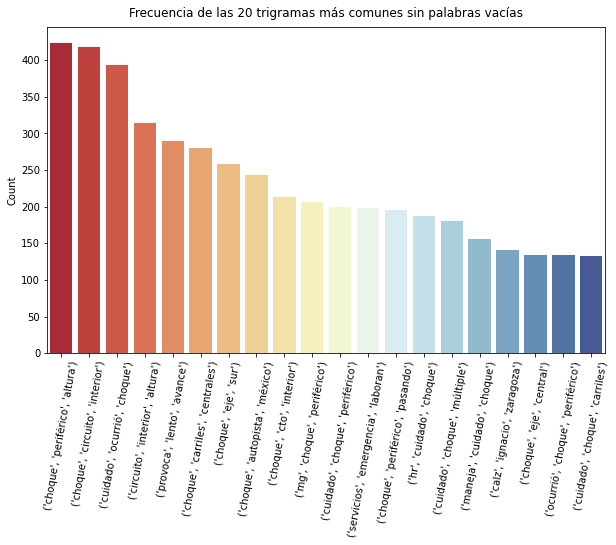

In [34]:
text = nltk.Text(all_words_except_stop_words)
freq_dist_trigrams = nltk.FreqDist(list(ngrams(text, 3)))

most_common_20 = np.array(list(map(lambda x: list(x), freq_dist_trigrams.most_common(20))))

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot()

sns.barplot(most_common_20[:, 0], most_common_20[:, 1], ax=ax, palette='RdYlBu');
ax.set_title('Frecuencia de las 20 trigramas más comunes sin palabras vacías', pad=10)
ax.set_ylabel('Count')
ax.tick_params(axis='x', rotation=80)

Finalmente obtenemos un grafico muy interesante donde podemos identificar zonas muy comunes en la CDMX en donde ocurren choques y accidentes viales.

Por ultimo podemos visualizar de una mejor manera la combinacion de palabras mas comunes en nuetro dataset, mediante la generacion de un WordCloud

In [35]:
!pip install wordcloud
from wordcloud import WordCloud

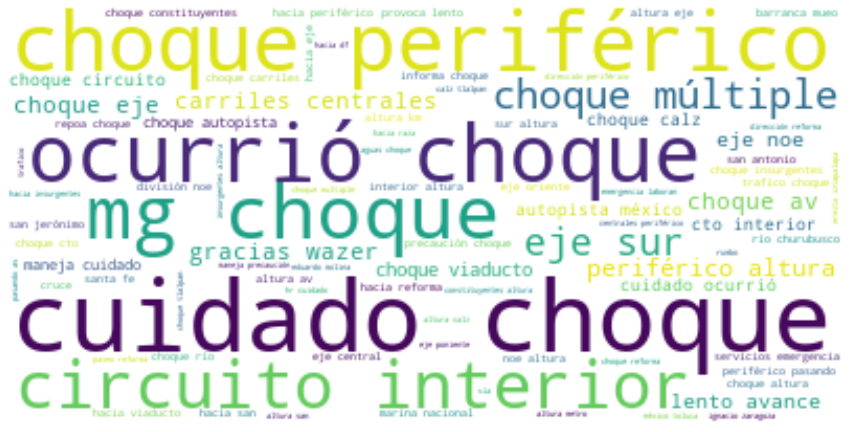

In [36]:
wordcloud = WordCloud(max_font_size=100, background_color="white").generate(' '.join(all_words_except_stop_words))

plt.figure(figsize=(15, 15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()